In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

In [2]:
data=pd.read_csv("..\\IMDB-Movie-Data.csv")
data=data.dropna(axis=0, how='any')
data.shape

(838, 33)

In [3]:
data.groupby("Success").count()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Success,,,,,,,,,,,,,,,,,,,,,
0.0,689,689,689,689,689,689,689,689,689,689,...,689,689,689,689,689,689,689,689,689,689
1.0,149,149,149,149,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149


[0.06148385 0.05744596 0.13211    0.26085258 0.20633356 0.07519091
 0.01893442 0.0357981  0.01382057 0.00973407 0.01533913 0.0119736
 0.02214364 0.01082919 0.00918054 0.00440454 0.00698395 0.00259564
 0.00224346 0.00476645 0.00933778 0.01010163 0.00281515 0.00855563
 0.00203732 0.00498835]


C:\Users\hasibenur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


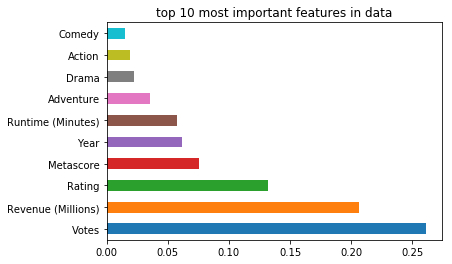

In [4]:
#Data for Analysis
X =data[data.columns[6:32]] #independent columns
Y=data.iloc[:,-1] #target column i.e success

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("top 10 most important features in data")
plt.show()

C:\Users\hasibenur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


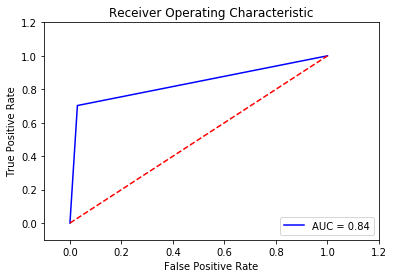

In [5]:
#Train and Test Splitting
x_train,x_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)
scaler = StandardScaler()
X_train =scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

#Model and Training
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)
y_pred = LogReg.predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [6]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)

Confusion Matrix is :
[[168   5]
 [ 11  26]]

Accuracy is :
0.9238095238095239

Precision is :
0.8387096774193549

Recall is: 
0.7027027027027027


In [7]:
print("Logistic Regresyon algoritma dogrulugu:", LogReg.score(X_test,Y_test))

Logistic Regresyon algoritma dogrulugu: 0.9238095238095239


### Submission

In [8]:
submission_predictions = LogReg.predict(X_test)

In [9]:
x_test.head()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
825,2007.0,133.0,7.4,95172.0,24.34,56.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,2016.0,105.0,5.8,30405.0,14.90,34.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,2016.0,102.0,6.0,75137.0,35.54,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
810,2012.0,109.0,7.7,192190.0,40.98,68.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
216,2010.0,118.0,5.9,148949.0,88.76,47.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
submission = pd.DataFrame({
        "Year": x_test["Year"],
        "Rating": x_test["Rating"],
        "Votes": x_test["Votes"],
        "Revenue (Millions)": x_test["Revenue (Millions)"],
        "Metascore": x_test["Metascore"],
        "Success": submission_predictions
    })

submission.to_csv("success2.csv", index=False)
print(submission.shape)

(210, 6)


In [11]:
submission.groupby("Success").count()

,Year,Rating,Votes,Revenue (Millions),Metascore
Success,,,,,
0.0,179,179,179,179,179
1.0,31,31,31,31,31


### Tahmin sonucu "Başarılı" olan verinin analizi:

In [12]:
submission[submission["Success"]==1.0].Year.value_counts()

2012.0    5
2015.0    5
2010.0    3
2014.0    3
2011.0    3
2007.0    3
2013.0    3
2008.0    2
2009.0    2
2006.0    1
2016.0    1
Name: Year, dtype: int64

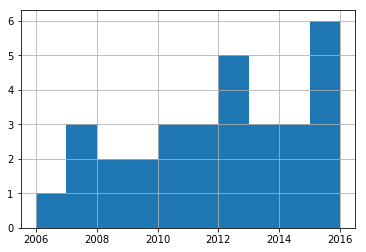

In [13]:
submission[submission["Success"]==1.0].Year.hist()

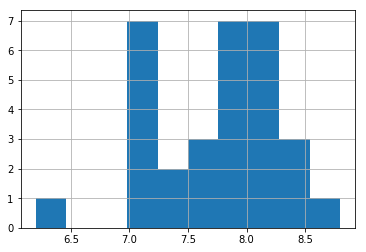

In [14]:
submission[submission["Success"]==1.0].Rating.hist()

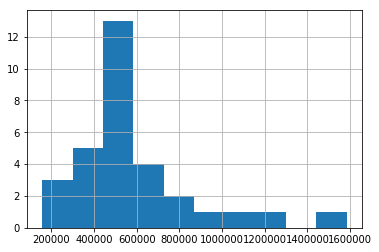

In [15]:
submission[submission["Success"]==1.0].Votes.hist()

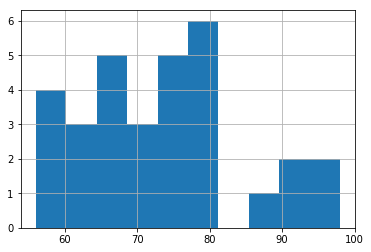

In [16]:
submission[submission["Success"]==1.0].Metascore.hist()

### Tahmin sonuçları "Başarısız" olan verinin analizi:

In [17]:
submission[submission["Success"]==0.0].Year.value_counts()

2016.0    48
2015.0    24
2014.0    17
2013.0    16
2012.0    15
2011.0    14
2010.0    11
2006.0    10
2007.0     9
2009.0     8
2008.0     7
Name: Year, dtype: int64

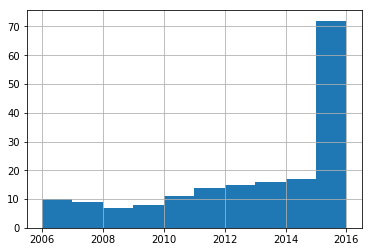

In [18]:
submission[submission["Success"]==0.0].Year.hist()

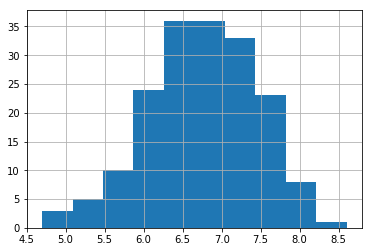

In [19]:
submission[submission["Success"]==0.0].Rating.hist()

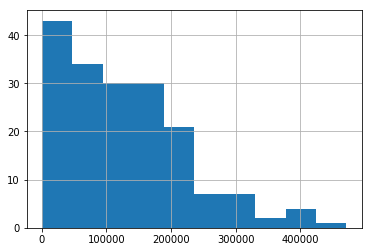

In [20]:
submission[submission["Success"]==0.0].Votes.hist()